## Generating Expression sets from GeoQuery

**bold**
dataset by Laloum T, Martín G, Duque P. of the Instituto Gulbenkian de Ciência

In [13]:
library(BiocManager)
library(GEOquery)
library(pheatmap)
dir <- ("C:/Path/to/directory")
setwd(dir)

Access soft/family files by specifying GEO accession code. I had to download the rpkm values and counts separately from the GEO accession site. 

In [2]:
gse = getGEO("GSE181122", GSEMatrix = TRUE, destdir = dir)

Found 1 file(s)

GSE181122_series_matrix.txt.gz

Using locally cached version: C:/Users/misum/OneDrive/Desktop/single_cell_rna_seq_workshop/plant scrna test/GSE181122/GSE181122_series_matrix.txt.gz

Rows: 0 Columns: 7

-- Column specification --------------------------------------------------------
Delimiter: "\t"
chr (7): ID_REF, GSM5487680, GSM5487681, GSM5487682, GSM5487683, GSM5487684,...


i Use `spec()` to retrieve the full column specification for this data.
i Specify the column types or set `show_col_types = FALSE` to quiet this message.

Using locally cached version of GPL13222 found here:
C:/Users/misum/OneDrive/Desktop/single_cell_rna_seq_workshop/plant scrna test/GSE181122/GPL13222.soft 



We can view metadata and covariates through phenoData(). This set has six samples with consistant environmental conditions across all experimental and control sets, but differ in genotype. Half are WT Col-0 and the other half scl30a mutants. 

In [3]:
show(pData(phenoData(gse[[1]]))[, c(1,2,6,9,12)])

                                      title geo_accession type
GSM5487680       18 hours-old WT seeds rep1    GSM5487680  SRA
GSM5487681       18 hours-old WT seeds rep2    GSM5487681  SRA
GSM5487682       18 hours-old WT seeds rep3    GSM5487682  SRA
GSM5487683 18 hours-old scl30a-1 seeds rep1    GSM5487683  SRA
GSM5487684 18 hours-old scl30a-1 seeds rep2    GSM5487684  SRA
GSM5487685 18 hours-old scl30a-1 seeds rep3    GSM5487685  SRA
                   organism_ch1 characteristics_ch1.2
GSM5487680 Arabidopsis thaliana       genotype: Col-0
GSM5487681 Arabidopsis thaliana       genotype: Col-0
GSM5487682 Arabidopsis thaliana       genotype: Col-0
GSM5487683 Arabidopsis thaliana    genotype: scl30a-1
GSM5487684 Arabidopsis thaliana    genotype: scl30a-1
GSM5487685 Arabidopsis thaliana    genotype: scl30a-1


The RPKM and counts should be already normalized, so we load it in as a table. 

In [14]:
expset <- (read.table("GSE181122_cRPKM_AND_COUNTS-araTha10-6.tab",
                      header=TRUE, sep = "\t", row.names=1, as.is=TRUE))

We can quickly run a few lines of code to view dimensions (24661r x 13c in this set) and column names.

In [15]:
dim(expset)
colnames(expset)

[1] 24661    13

[1] "NAME"                  "scl30a_18hWL_a.cRPKM"  "scl30a_18hWL_a.Counts"
 [4] "scl30a_18hWL_b.cRPKM"  "scl30a_18hWL_b.Counts" "scl30a_18hWL_c.cRPKM" 
 [7] "scl30a_18hWL_c.Counts" "WT_18hWL_a.cRPKM"      "WT_18hWL_a.Counts"    
[10] "WT_18hWL_b.cRPKM"      "WT_18hWL_b.Counts"     "WT_18hWL_c.cRPKM"     
[13] "WT_18hWL_c.Counts"

Since the expression values are our primary focus, I subset these columns (and the gene names as well). I also removed any rows with N/A values. 

In [16]:
count_removal <- expset[,c(1,2,4,6,8,10,12)]
exsubset <- na.omit(count_removal)

Filtering for high gene expression (I set the threshold higher because I'm running this on a low-end laptop). 

In [17]:
numvalues <- exsubset[rowSums(exsubset[,-1]) > 8000,]

Simple heatmap: 

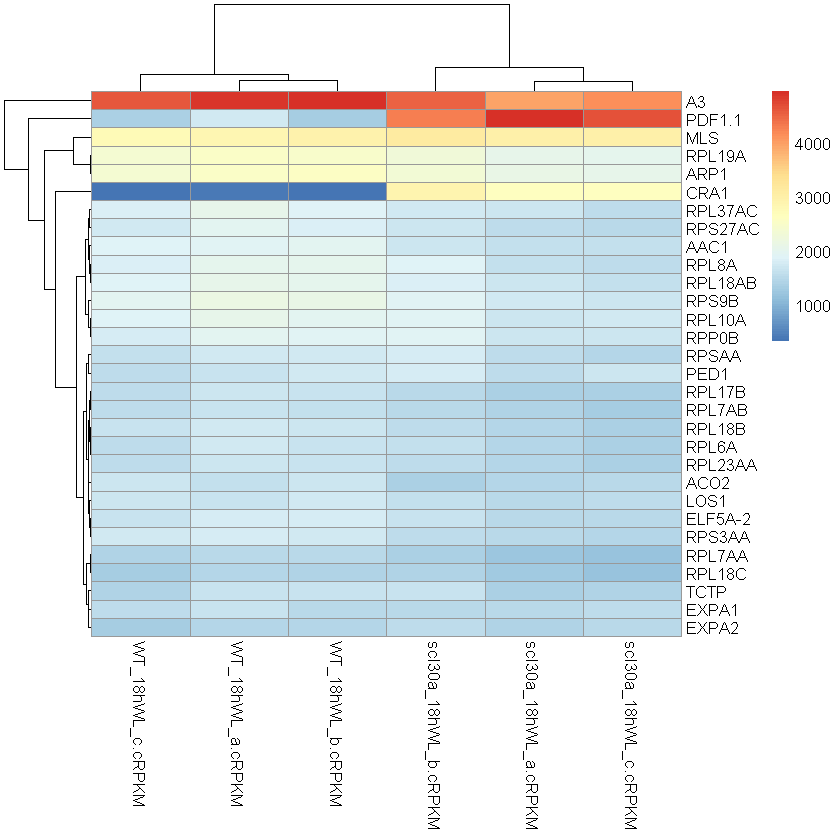

In [18]:
pheatmap(numvalues[,-1], labels_row = numvalues[,1])